In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [259]:
exercise = pd.read_csv('myfitnesspal/Exercise-Summary.csv', index_col = 0)
measurement = pd.read_csv('myfitnesspal/Measurement-Summary.csv', index_col = 0)
nutrition = pd.read_csv('myfitnesspal/Nutrition-Summary.csv', index_col = 0)

In [260]:
exercise.index = pd.to_datetime(exercise.index)
measurement.index = pd.to_datetime(measurement.index)
nutrition.index = pd.to_datetime(nutrition.index)

print("Exercise Period :  ", exercise.index[0] , ' - ', exercise.index[-1])
print("Measurement Period :  ", measurement.index[0] , ' - ', measurement.index[-1])
print("Nutrition Period :  ", nutrition.index[0] , ' - ', nutrition.index[-1])

print("Overall Period: ", min(exercise.index[0],measurement.index[0],nutrition.index[0]), ' - ',
                          max(exercise.index[-1],measurement.index[-1],nutrition.index[-1]))

startDate = min(exercise.index[0],measurement.index[0],nutrition.index[0])
endDate = max(exercise.index[-1],measurement.index[-1],nutrition.index[-1])

Exercise Period :   2012-11-10 00:00:00  -  2018-02-13 00:00:00
Measurement Period :   2012-11-10 00:00:00  -  2018-02-13 00:00:00
Nutrition Period :   2012-11-11 00:00:00  -  2018-02-13 00:00:00
Overall Period:  2012-11-10 00:00:00  -  2018-02-13 00:00:00


In [261]:
exercise.head()

,Exercise,Type,Exercise Calories,Exercise Minutes,Sets,Reps Per Set,Kilograms,Steps
Date,,,,,,,,
2012-11-10,Dips,Strength,NaN,NaN,7.0,10.0,36.3,NaN
2012-11-10,"Rowing, stationary, very vigorous effort",Cardio,227.0,22.0,NaN,NaN,NaN,NaN
2012-11-10,"Step-ups, vigorous",Cardio,251.0,20.0,NaN,NaN,NaN,NaN
2012-11-11,Chin-Ups,Strength,NaN,NaN,3.0,8.0,36.3,NaN
2012-11-11,Dips,Strength,NaN,NaN,5.0,10.0,36.3,NaN


In [262]:
exercise.fillna(value=0, inplace=True)

def boolStrength(x):
    if x == 0.0:
        return '1' # yes
    else:
        return '0' # no
    
exercise_agg = pd.DataFrame(index=pd.date_range(start=startDate, end=endDate ,freq='D'))

In [263]:
for column in exercise.columns:
    if column in ['Exercise Calories', 'Exercise Minutes', 'Steps', 'Sets', 'Reps Per Set']:
        exercise_agg[column] = exercise.groupby('Date')[column].sum()
        
exercise_agg['Strength Training'] = exercise.groupby('Date')['Exercise Calories'].min()
exercise_agg['Strength Training'] = exercise_agg['Strength Training'].apply(lambda x: boolStrength(x))

In [264]:
exercise_agg.fillna(value=0, inplace=True)

In [265]:
exercise_agg.head()

,Exercise Calories,Exercise Minutes,Sets,Reps Per Set,Steps,Strength Training
2012-11-10,478.0,42.0,7.0,10.0,0.0,1
2012-11-11,577.0,55.0,8.0,18.0,0.0,1
2012-11-12,482.0,55.0,0.0,0.0,0.0,0
2012-11-13,441.0,40.0,3.0,10.0,0.0,1
2012-11-14,0.0,0.0,0.0,0.0,0.0,0


In [266]:
measurement.head()

,% Body Fat,Biceps,Calves,Hips,Neck,Tights,Waist,Weight
Date,,,,,,,,
2012-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.8
2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.1
2012-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.5
2012-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.9
2012-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.2


In [267]:
measurement_agg = pd.DataFrame(index=pd.date_range(start=startDate, end=endDate ,freq='D'))

In [268]:
for column in measurement.columns:
    measurement_agg[column] = measurement.groupby('Date')[column].mean()
    measurement_agg[column].interpolate(inplace=True)
    
measurement_agg['Height'] = 1.76  #constant durting the entire period
measurement_agg['BMI'] = np.round(measurement_agg['Weight'] / measurement_agg['Height']**2,2)
measurement_agg['Age'] = np.round((measurement_agg.index - pd.Timestamp('1988-06-07')) / pd.Timedelta(days=365),1)

In [269]:
measurement_agg.head()

,% Body Fat,Biceps,Calves,Hips,Neck,Tights,Waist,Weight,Height,BMI,Age
2012-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.80,1.76,36.74,24.4
2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.10,1.76,36.83,24.4
2012-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.80,1.76,36.74,24.4
2012-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.50,1.76,36.64,24.5
2012-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.58,1.76,36.67,24.5


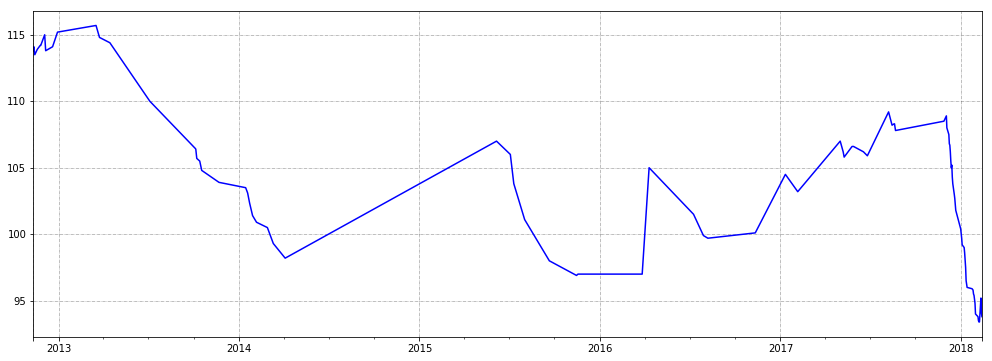

In [270]:
fig, axes = plt.subplots()
fig.set_size_inches(17, 6)
measurement_agg['Weight'].plot.line(color='b')
axes.grid(color='black', alpha=0.5, linestyle='-.', linewidth=0.5)

In [271]:
nutrition.head()

,Meal,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron
Date,,,,,,,,,,,,,,,,,,
2012-11-11,Breakfast,574.0,28.4,18.7,0.0,0.0,0.0,0.0,186.0,0.0,60.7,0.0,53.9,18.5,0.0,0.0,0.0,0.0
2012-11-11,Lunch,805.0,35.0,14.7,0.0,11.9,0.0,182.0,2597.0,0.0,91.0,22.4,0.0,35.0,0.0,0.0,0.0,0.0
2012-11-11,Dinner,614.8,41.6,11.4,3.6,19.4,0.0,44.6,656.8,1638.6,50.4,8.4,30.5,18.8,78.4,114.7,44.2,14.1
2012-11-11,Snacks,72.0,0.0,0.0,0.0,0.0,0.0,0.0,133.0,0.0,17.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0
2012-11-12,Lunch,840.0,59.0,13.0,0.0,0.0,0.0,153.0,1787.0,672.0,81.5,2.0,0.0,56.3,0.0,0.0,2.0,10.0


In [272]:
nutrition['Fat'] = nutrition['Fat (g)']
nutrition['Sodium'] = nutrition['Sodium (mg)']
nutrition['Carbohydrates'] = nutrition['Carbohydrates (g)']
nutrition['Protein'] = nutrition['Protein (g)']

nutrition.drop(['Fat (g)', 'Sodium (mg)', 'Carbohydrates (g)', 'Protein (g)'],axis=1,inplace=True)

In [273]:
nutrition_agg = pd.DataFrame(index=pd.date_range(start=startDate, end=endDate ,freq='D'))

In [274]:
nutrition.fillna(value=0, inplace=True)

for column in nutrition.columns:
    nutrition_agg[column] = nutrition.groupby('Date')[column].sum()
    
nutrition_agg['Number of Meals'] = nutrition.groupby('Date')['Meal'].count()

In [275]:
nutrition_agg.drop('Meal', axis=1, inplace=True)
nutrition_agg.fillna(value=0,inplace=True)
nutrition_agg.head()

,Calories,Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Potassium,Fiber,Sugar,Vitamin A,Vitamin C,Calcium,Iron,Fat,Sodium,Carbohydrates,Protein,Number of Meals
2012-11-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-11-11,2065.8,44.8,3.6,31.3,0.0,226.6,1638.6,30.8,100.4,78.4,114.7,44.2,14.1,105.0,3572.8,219.1,72.3,4.0
2012-11-12,3731.5,46.8,4.3,19.6,0.0,242.2,3949.1,30.4,200.7,156.8,229.5,94.4,38.2,204.0,3184.8,349.0,110.8,3.0
2012-11-13,2014.8,28.0,5.9,37.4,0.0,650.6,1737.6,36.4,74.3,88.5,93.5,48.2,69.2,91.2,3496.8,215.9,71.8,4.0
2012-11-14,1032.0,19.0,0.0,0.0,0.4,80.0,0.0,6.0,32.0,20.0,16.0,40.0,72.0,35.0,2745.0,142.0,46.0,3.0


In [276]:
fullData = pd.concat([nutrition_agg, exercise_agg, measurement_agg], axis=1)
fullData.head()

,Calories,Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Potassium,Fiber,Sugar,Vitamin A,...,Biceps,Calves,Hips,Neck,Tights,Waist,Weight,Height,BMI,Age
2012-11-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,113.80,1.76,36.74,24.4
2012-11-11,2065.8,44.8,3.6,31.3,0.0,226.6,1638.6,30.8,100.4,78.4,...,NaN,NaN,NaN,NaN,NaN,NaN,114.10,1.76,36.83,24.4
2012-11-12,3731.5,46.8,4.3,19.6,0.0,242.2,3949.1,30.4,200.7,156.8,...,NaN,NaN,NaN,NaN,NaN,NaN,113.80,1.76,36.74,24.4
2012-11-13,2014.8,28.0,5.9,37.4,0.0,650.6,1737.6,36.4,74.3,88.5,...,NaN,NaN,NaN,NaN,NaN,NaN,113.50,1.76,36.64,24.5
2012-11-14,1032.0,19.0,0.0,0.0,0.4,80.0,0.0,6.0,32.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,113.58,1.76,36.67,24.5


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


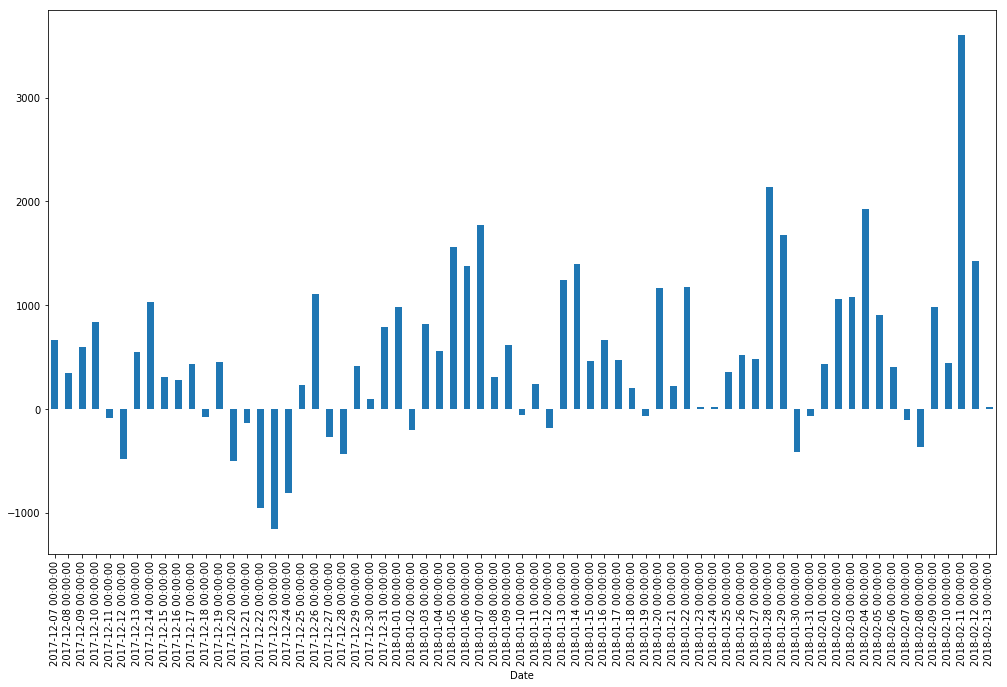

In [277]:
df = fullData['2017-12-07':]
df.index.name = 'Date'
df['Net Calories'] = nutrition_agg['Calories'] - exercise_agg['Exercise Calories']

fig, axes = plt.subplots()
fig.set_size_inches(17, 10)
df['Net Calories'].plot.bar()

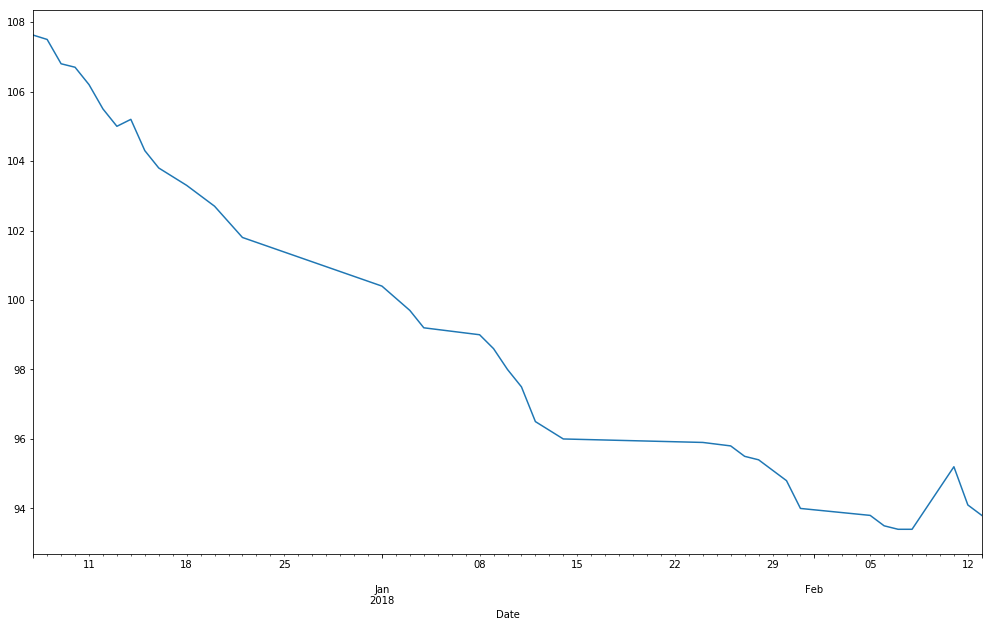

In [278]:
fig, axes = plt.subplots()
fig.set_size_inches(17, 10)
df['Weight'].plot.line()

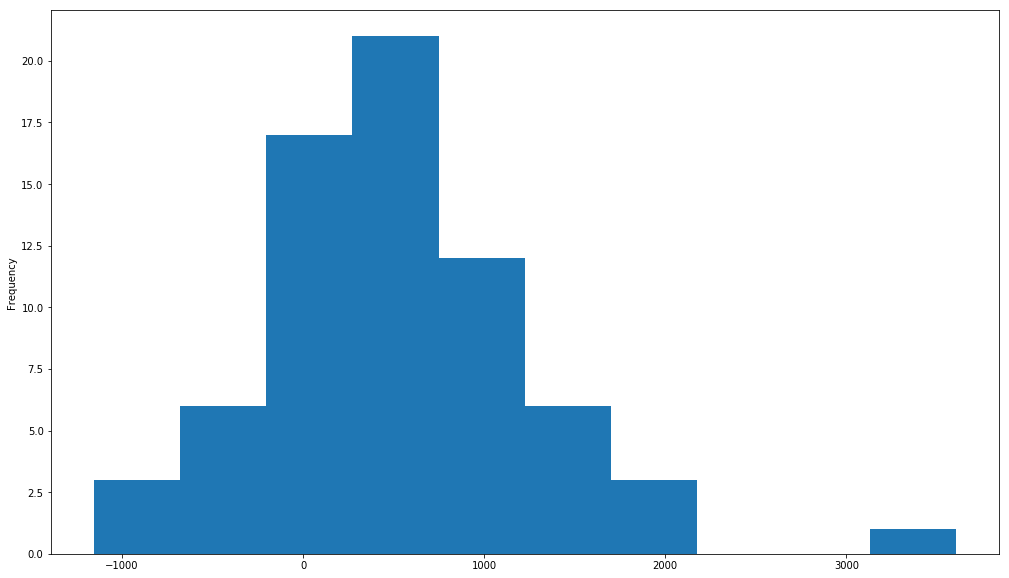

In [279]:
fig, axes = plt.subplots()
fig.set_size_inches(17, 10)
df['Net Calories'].plot.hist()

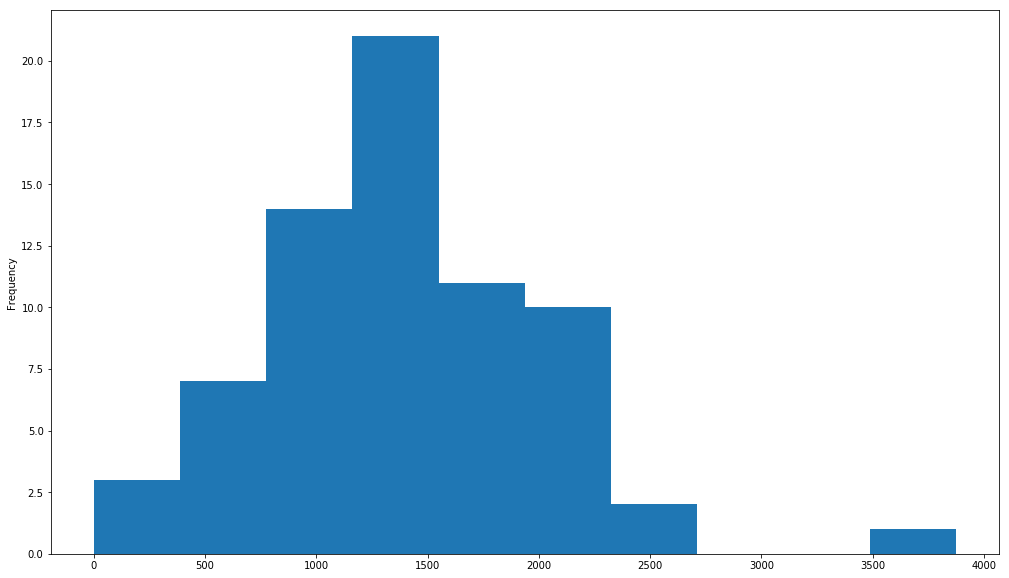

In [280]:
fig, axes = plt.subplots()
fig.set_size_inches(17, 10)
df['Calories'].plot.hist()

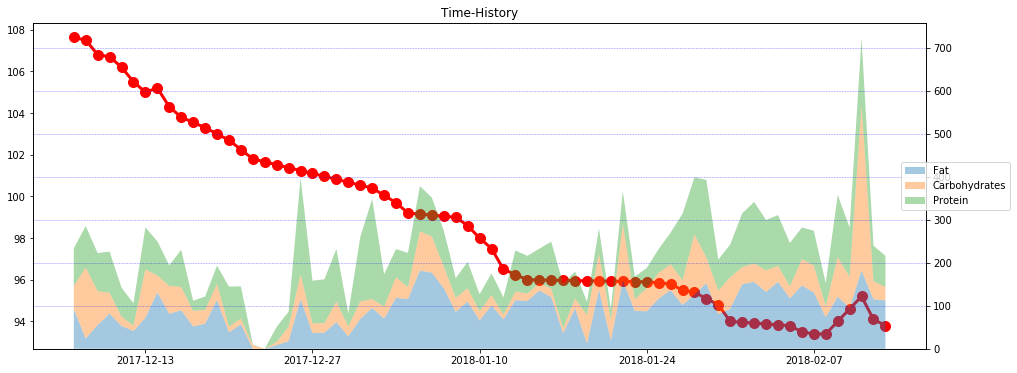

In [281]:
fig, axes = plt.subplots()

fig.set_size_inches(16, 6)

labels = ["Fat", "Carbohydrates", "Protein"]

axes2 = axes.twinx()

axes2.stackplot(df.index, df['Fat'], 
                         df['Carbohydrates'], 
                         df['Protein'],
                         labels = labels, alpha=0.4)

axes.plot(df.index, df['Weight'], 'r', lw=3, marker='o', markersize=10)

axes2.legend(loc=7, bbox_to_anchor=(1.1, 0.5))
axes2.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes2.set_title('Time-History');

In [282]:
df2 = df[[   'Fat', 
             'Carbohydrates', 
             'Protein', 
             'Weight', 
             'Calories',
             'Potassium',
             'Fiber',
             'Sugar',
             'Sodium',
             'Vitamin C',
             'Vitamin A',
             'Iron',
             'Cholesterol',
             'Number of Meals',
             'Exercise Calories',
             'Exercise Minutes',
             'Net Calories',
             'Age']]

In [283]:
df2['Cumulative Caloric Balance'] = (df2['Weight'] - df2.ix[0]['Weight'])*9000
df2['Caloric Balance'] = df2['Cumulative Caloric Balance'].diff()
df2['Daily BMR'] = df2['Caloric Balance'] - df2['Net Calories']

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

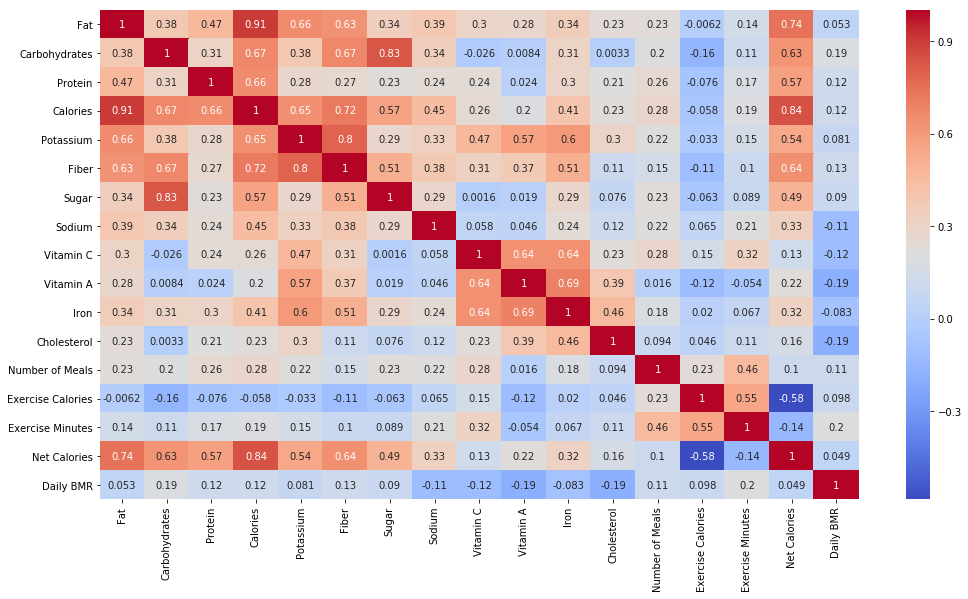

In [284]:
fig, ax = plt.subplots(figsize=(17,9)) # increasing the original size of the heatmap
sns.heatmap(df2[['Fat', 
             'Carbohydrates', 
             'Protein', 
             'Calories',
             'Potassium',
             'Fiber',
             'Sugar',
             'Sodium',
             'Vitamin C',
             'Vitamin A',
             'Iron',
             'Cholesterol',
             'Number of Meals',
             'Exercise Calories',
             'Exercise Minutes',
             'Net Calories', 'Daily BMR']].corr(), cmap='coolwarm', annot=True)

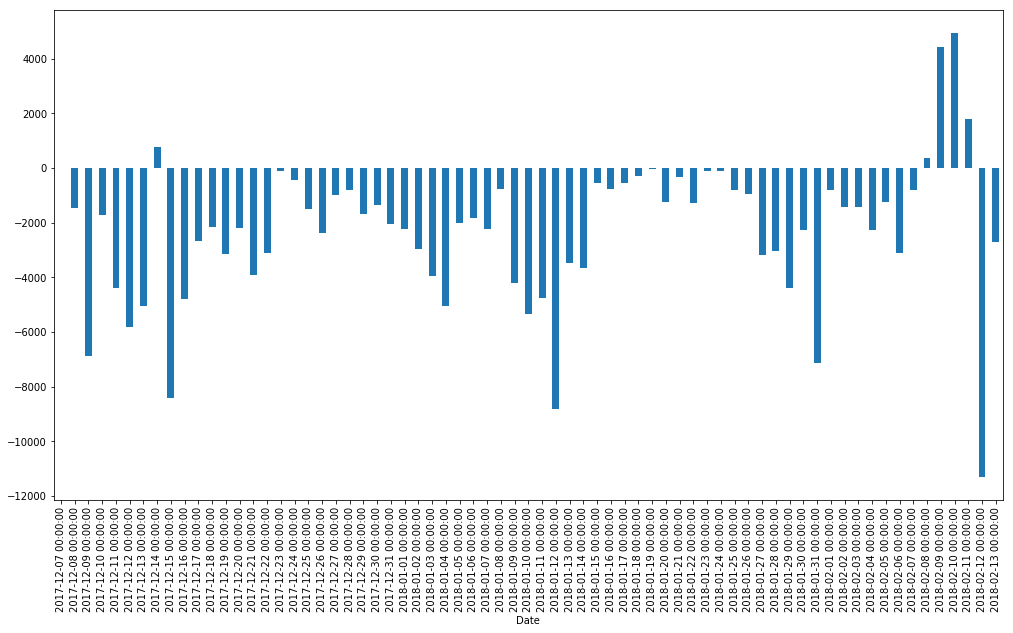

In [285]:
fig, ax = plt.subplots(figsize=(17,9))
df2['Daily BMR'].plot.bar()

In [286]:
X = df2[[    'Sodium',
             'Vitamin C',
             'Cholesterol',
             'Exercise Minutes']]

y = df2['Daily BMR']
y.ix[0] = np.mean(y)

y.head()

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Date
2017-12-07   -2326.220588
2017-12-08   -1473.000000
2017-12-09   -6892.700000
2017-12-10   -1733.700000
2017-12-11   -4407.100000
Freq: D, Name: Daily BMR, dtype: float64

In [287]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

lm = sm.OLS(y, X)
prediction = lm.fit(use_t=True)

print(prediction.summary())

                            OLS Regression Results                            
Dep. Variable:              Daily BMR   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     14.80
Date:                Wed, 14 Feb 2018   Prob (F-statistic):           1.19e-08
Time:                        15:29:36   Log-Likelihood:                -638.69
No. Observations:                  69   AIC:                             1285.
Df Residuals:                      65   BIC:                             1294.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Sodium              -0.5148      0.196  

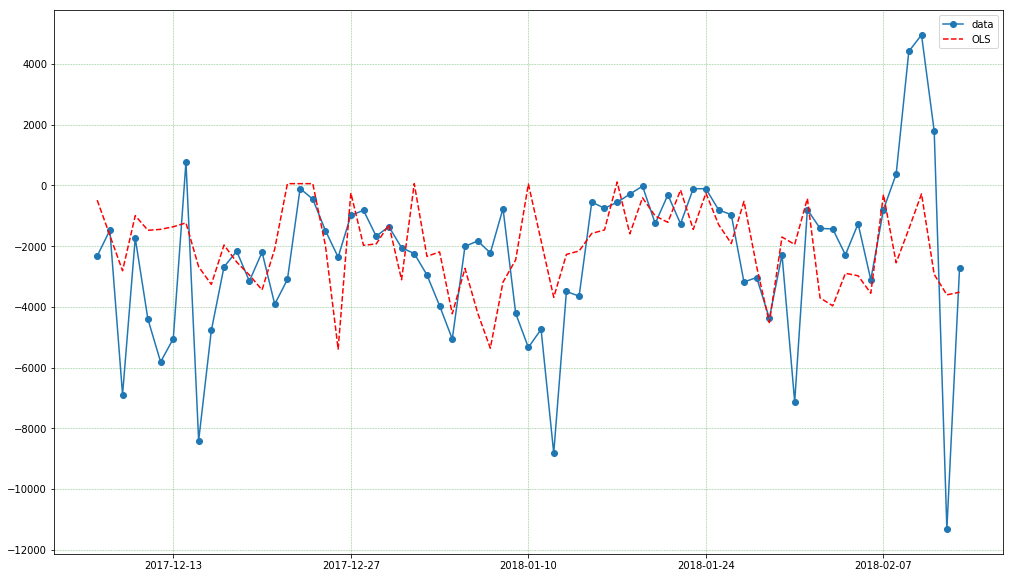

In [288]:
prstd, iv_l, iv_u = wls_prediction_std(prediction)

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df2.index, y, 'o-', label="data")
ax.plot(df2.index, prediction.fittedvalues, 'r--', label="OLS")
#ax.plot(df2.index, iv_u, 'r--')
#ax.plot(df2.index, iv_l, 'r--')
ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

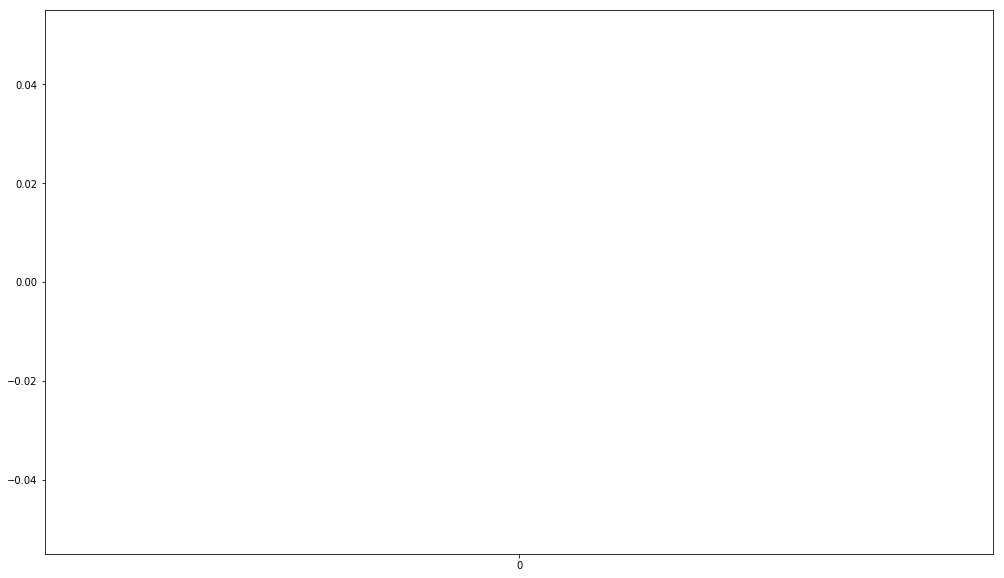

In [289]:
fig, ax = plt.subplots(figsize=(17,10))

sns.swarmplot()

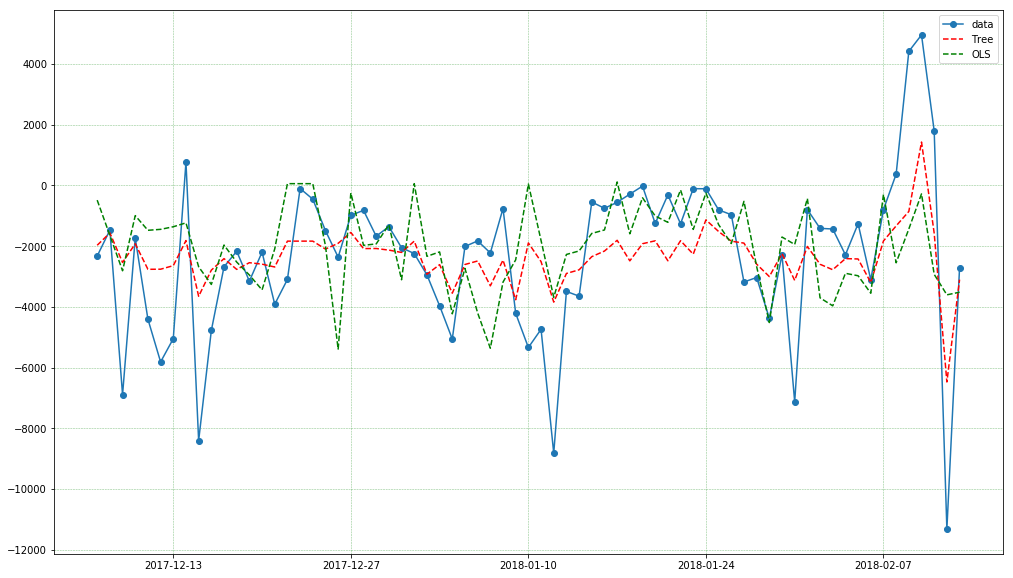

In [290]:
from sklearn.ensemble import RandomForestRegressor

features = X.columns

forest = RandomForestRegressor(n_estimators=1500, random_state = 0, oob_score = True, max_depth=3, max_features=0.33)
forest.fit(X, y)

forest.oob_score_

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df2.index, y, 'o-', label="data")
ax.plot(df2.index, forest.predict(X), 'r--', label="Tree")
ax.plot(df2.index, prediction.fittedvalues, 'g--', label="OLS")

ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

([<matplotlib.axis.YTick at 0x1b1ed3ea908>,
 <a list of 4 Text yticklabel objects>)

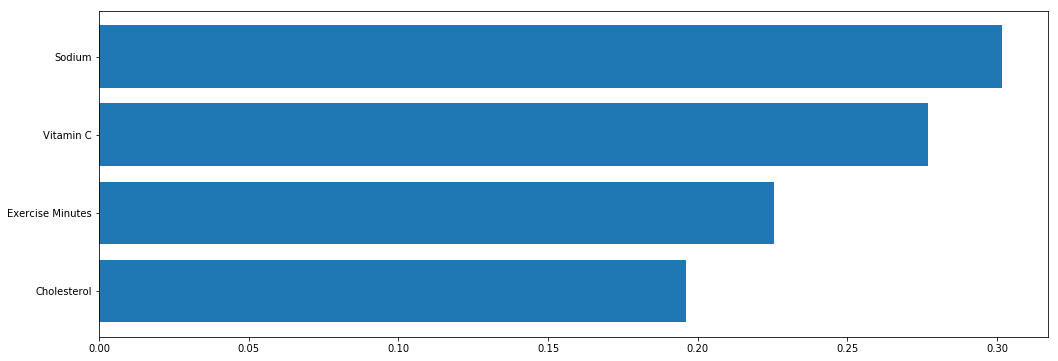

In [291]:
forest.feature_importances_

bar_x = range(len(forest.feature_importances_))

indices = np.argsort(forest.feature_importances_)
sorted_importances = []

for i in indices:
    sorted_importances.append(X.columns[i])

fig, ax = plt.subplots(figsize=(17,6))
plt.barh(bar_x, forest.feature_importances_[indices])
plt.yticks(bar_x, sorted_importances)

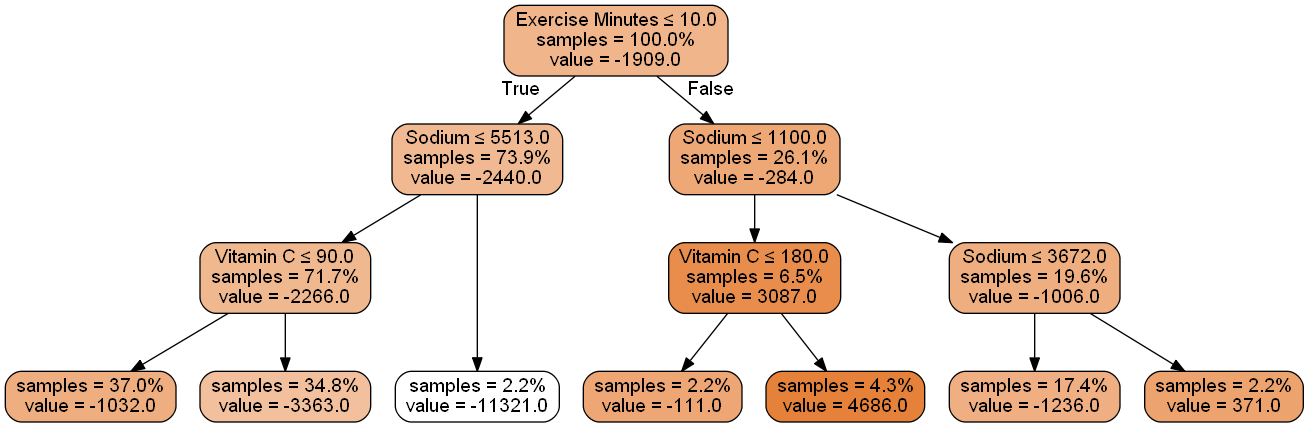

In [292]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

import os     
os.environ["PATH"] += os.pathsep + 'C:/anaconda3/Library/bin/graphviz'

tree_scores = [tree.score(X, y) for tree in forest]

best_tree = tree_scores.index(max(tree_scores))

dot_data = StringIO()
export_graphviz(forest[best_tree], 
                out_file=dot_data,  
                filled=True,
                precision=0,
                special_characters=True,
                feature_names=features,
                leaves_parallel=True,
                rounded=True,
                rotate=False, 
                proportion=True, 
                impurity=False
               )
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [293]:
df2.columns

Index(['Fat', 'Carbohydrates', 'Protein', 'Weight', 'Calories', 'Potassium',
       'Fiber', 'Sugar', 'Sodium', 'Vitamin C', 'Vitamin A', 'Iron',
       'Cholesterol', 'Number of Meals', 'Exercise Calories',
       'Exercise Minutes', 'Net Calories', 'Age', 'Cumulative Caloric Balance',
       'Caloric Balance', 'Daily BMR'],
      dtype='object')

In [294]:
X = df2[[ 'Fat', 'Carbohydrates', 'Protein', 'Calories', 'Potassium',
       'Fiber', 'Sugar', 'Sodium', 'Vitamin C', 'Vitamin A', 'Iron',
       'Cholesterol', 'Number of Meals', 'Exercise Calories',
       'Exercise Minutes', 'Weight', 'Age'
       ]]

X['Const'] = 1
'''
Y = df2[1:]['Daily BMR'].values
Y = np.append(Y,np.mean(Y))
y = pd.Series(data = Y, index=pd.date_range(start=pd.Timestamp('2017-12-07'), end=endDate ,freq='D'))
'''

y = df2['Daily BMR']

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [295]:
lm = sm.OLS(y, X)
prediction = lm.fit(use_t=True)

print(prediction.summary())

                            OLS Regression Results                            
Dep. Variable:              Daily BMR   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 14 Feb 2018   Prob (F-statistic):              0.261
Time:                        15:29:39   Log-Likelihood:                -628.92
No. Observations:                  69   AIC:                             1294.
Df Residuals:                      51   BIC:                             1334.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fat                  -5.0017     41.21

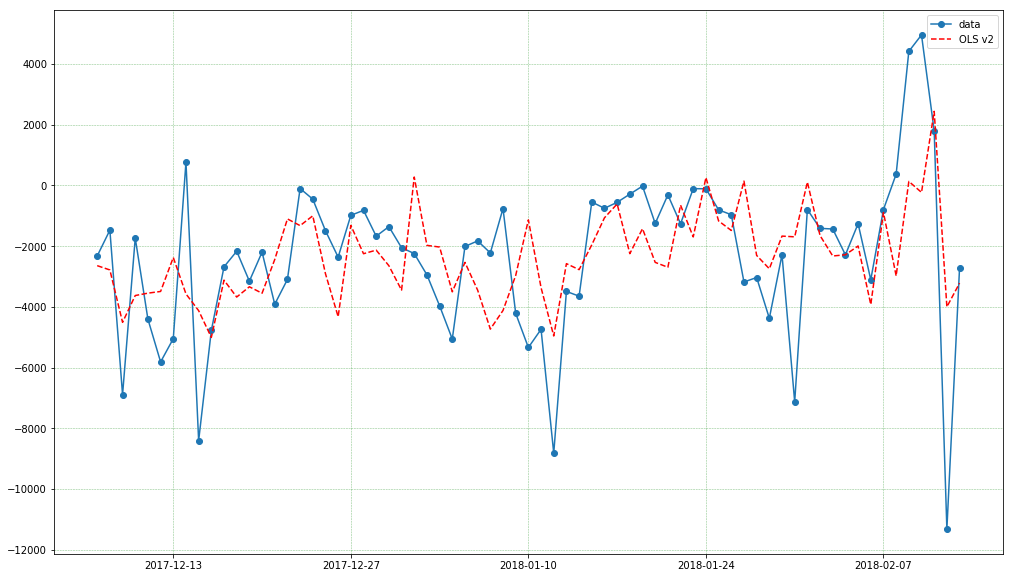

In [296]:
prstd, iv_l, iv_u = wls_prediction_std(prediction)

fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df2.index, y, 'o-', label="data")
ax.plot(df2.index, prediction.fittedvalues, 'r--', label="OLS v2")
#ax.plot(df2.index, iv_u, 'r--')
#ax.plot(df2.index, iv_l, 'r--')
ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

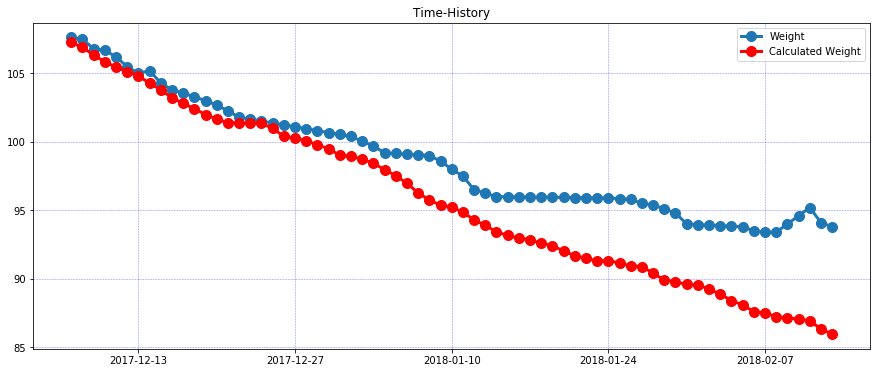

In [297]:
#df2['BMR'] = np.dot(X, prediction.params)
df2['BMR'] = prediction.predict(X)
df2['Caloric Balance'] = df2['Net Calories'] - df2['BMR']
df2['Cumulative Caloric Balance'] = df2['Caloric Balance'].cumsum()
df2['Calculated Weight'] = df2.ix[0]['Weight'] - df2['Cumulative Caloric Balance']/9000

fig, axes = plt.subplots()

fig.set_size_inches(15, 6)

axes.plot(df2.index, df2['Weight'], lw=3, marker='o', markersize=10)
axes.plot(df2.index, df2['Calculated Weight'], 'r', lw=3, marker='o', markersize=10)

axes.legend()
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.set_title('Time-History');

In [298]:
'''from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
    
param_grid = { 
        "n_estimators"      : [50],
        "min_samples_leaf"  : range(1,21,1),
        "min_samples_split" : range(2,11,1),
        "max_depth"         : range(2,11,1),
        "oob_score"         : [True],
        "random_state"      : [0],
        
        "max_features"      : [0.33]
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, return_train_score=True, scoring='neg_mean_squared_error')
grid.fit(X, y)

grid.best_score_ , grid.best_params_'''

'from sklearn.model_selection import GridSearchCV\n\nestimator = RandomForestRegressor()\n    \nparam_grid = { \n        "n_estimators"      : [50],\n        "min_samples_leaf"  : range(1,21,1),\n        "min_samples_split" : range(2,11,1),\n        "max_depth"         : range(2,11,1),\n        "oob_score"         : [True],\n        "random_state"      : [0],\n        \n        "max_features"      : [0.33]\n        }\n\ngrid = GridSearchCV(estimator, param_grid, n_jobs=-1, return_train_score=True, scoring=\'neg_mean_squared_error\')\ngrid.fit(X, y)\n\ngrid.best_score_ , grid.best_params_'

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

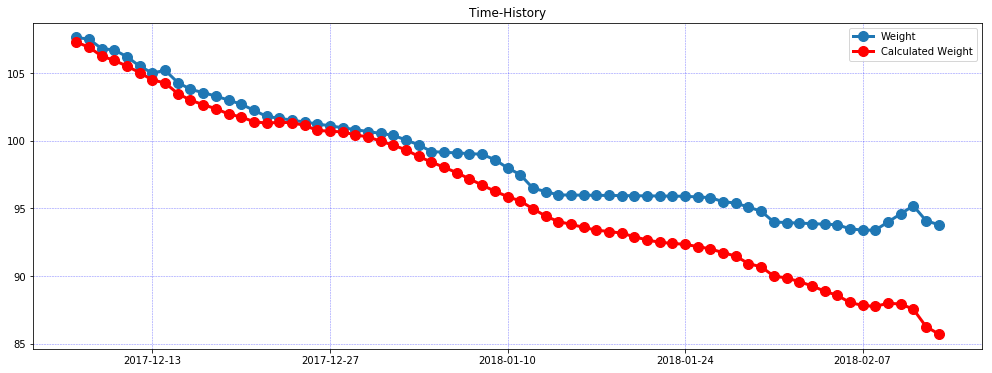

In [299]:
#forest = RandomForestRegressor(n_estimators=10, random_state = 0, max_depth=3, max_features=0.33, min_samples_leaf=2,
#                              min_samples_split=9, oob_score=True)

forest = RandomForestRegressor()

forest.fit(X, y)

df2['BMR'] = forest.predict(X)
df2['Caloric Balance'] = df2['Net Calories'] - df2['BMR']
df2['Cumulative Caloric Balance'] = df2['Caloric Balance'].cumsum()
df2['Calculated Weight'] = df2.ix[0]['Weight'] - df2['Cumulative Caloric Balance']/9000

fig, axes = plt.subplots()

fig.set_size_inches(17, 6)

axes.plot(df2.index, df2['Weight'], lw=3, marker='o', markersize=10)
axes.plot(df2.index, df2['Calculated Weight'], 'r', lw=3, marker='o', markersize=10)

axes.legend()
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.set_title('Time-History');

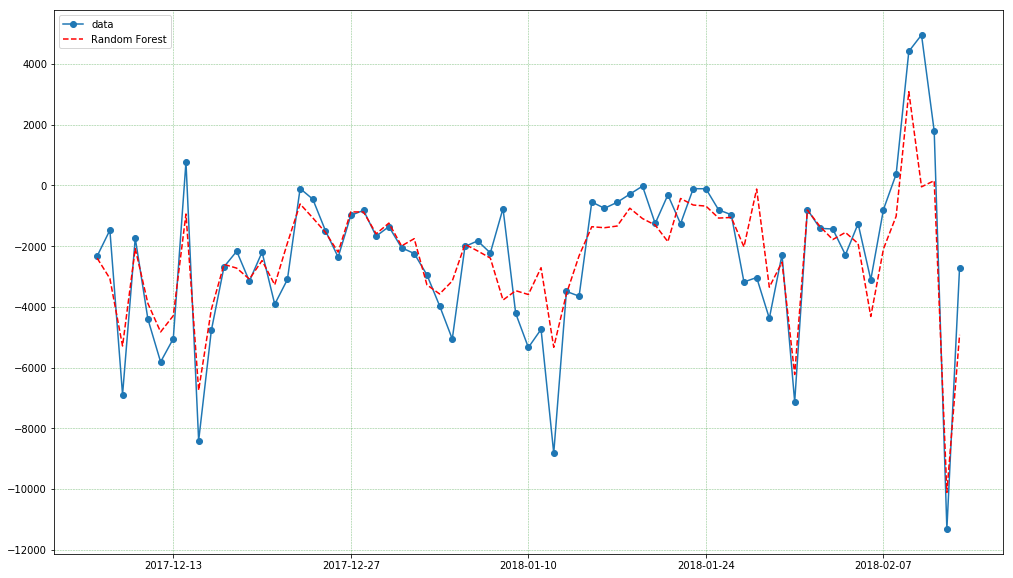

In [304]:
fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df2.index, y, 'o-', label="data")
ax.plot(df2.index, forest.predict(X), 'r--', label="Random Forest")
ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

In [300]:
df2['BMR'].describe()

count       69.000000
mean     -2356.510644
std       1873.323535
min     -10111.840000
25%      -3275.130000
50%      -2023.570000
75%      -1092.410000
max       3086.920000
Name: BMR, dtype: float64

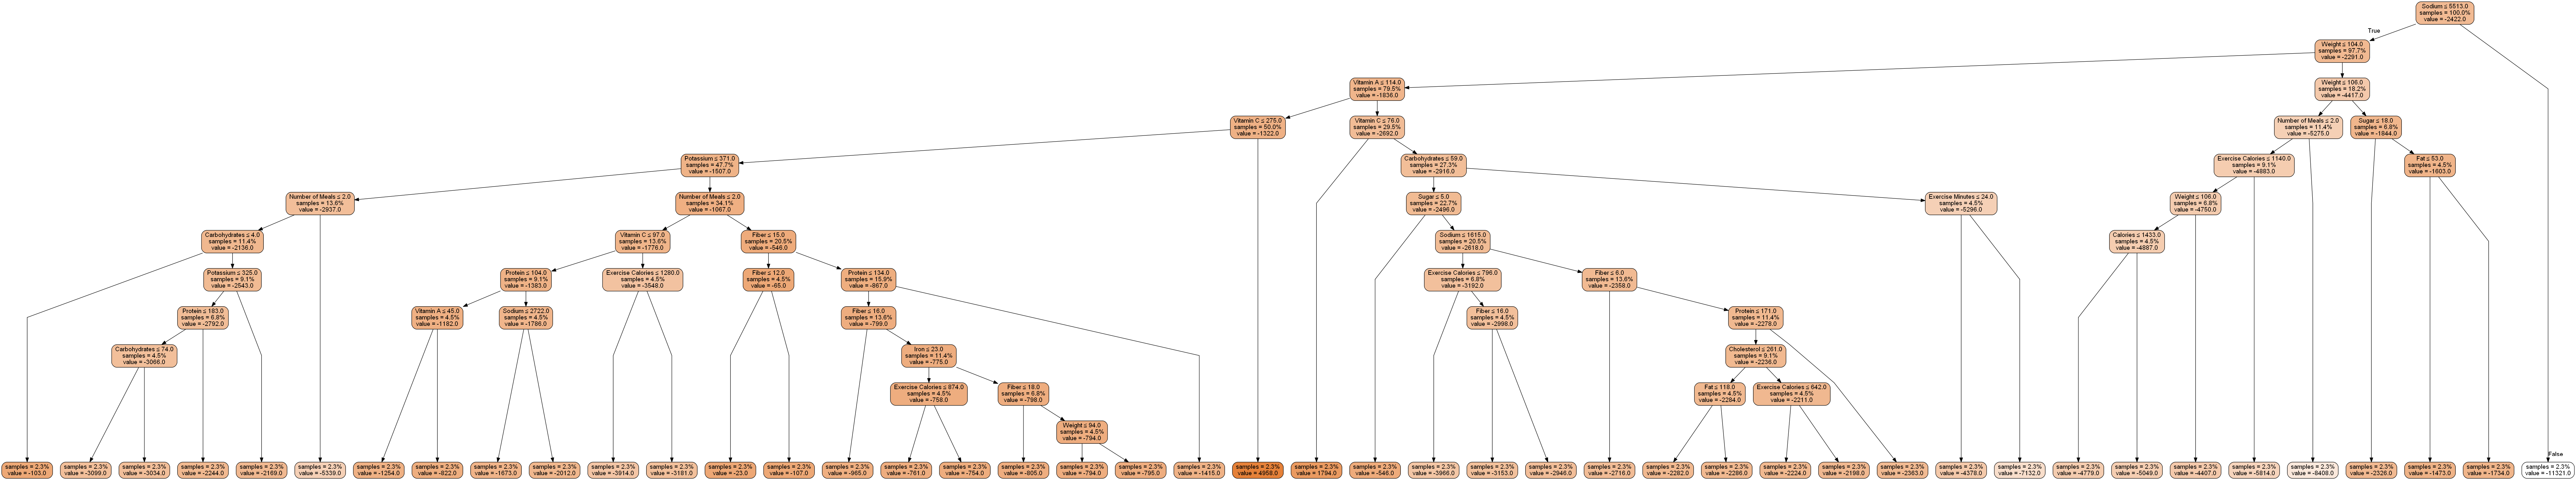

In [309]:
features = X.columns

tree_scores = [tree.score(X, y) for tree in forest]

best_tree = tree_scores.index(max(tree_scores))

dot_data = StringIO()
export_graphviz(forest[best_tree], 
                out_file=dot_data,  
                filled=True,
                precision=0,
                special_characters=True,
                feature_names=features,
                leaves_parallel=True,
                rounded=True,
                rotate=False, 
                proportion=True, 
                impurity=False
               )
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value 

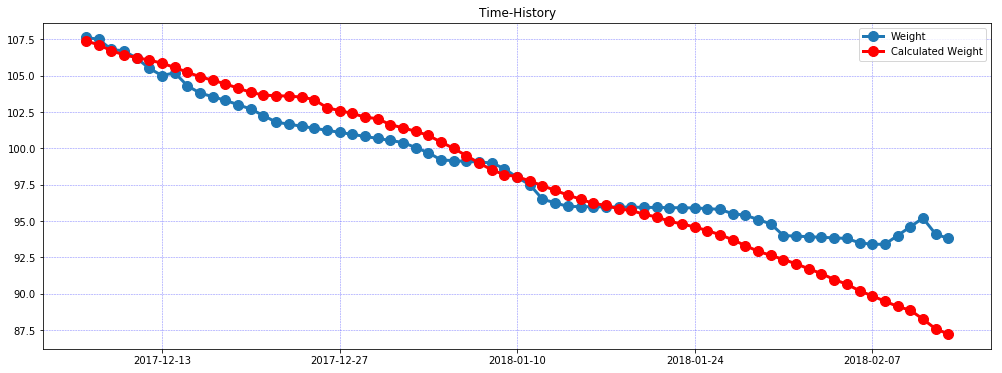

In [301]:
from sklearn.neural_network import MLPRegressor

NN = MLPRegressor()

NN.fit(X, y)

df2['BMR'] = NN.predict(X)
df2['Caloric Balance'] = df2['Net Calories'] - df2['BMR']
df2['Cumulative Caloric Balance'] = df2['Caloric Balance'].cumsum()
df2['Calculated Weight'] = df2.ix[0]['Weight'] - df2['Cumulative Caloric Balance']/9000

fig, axes = plt.subplots()

fig.set_size_inches(17, 6)

axes.plot(df2.index, df2['Weight'], lw=3, marker='o', markersize=10)
axes.plot(df2.index, df2['Calculated Weight'], 'r', lw=3, marker='o', markersize=10)

axes.legend()
axes.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
axes.set_title('Time-History');

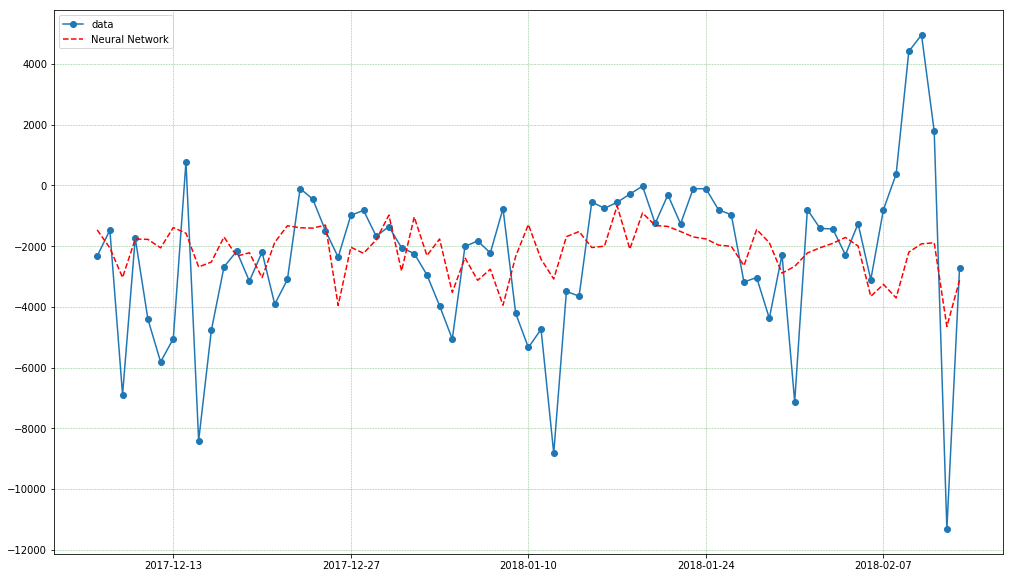

In [303]:
fig, ax = plt.subplots(figsize=(17,10))

ax.plot(df2.index, y, 'o-', label="data")
ax.plot(df2.index, NN.predict(X), 'r--', label="Neural Network")
ax.legend(loc='best');
ax.grid(color='g', alpha=0.5, linestyle='dashed', linewidth=0.5)

In [307]:
df2['BMR'].describe()

count      69.000000
mean    -2161.315582
std       795.118745
min     -4647.520067
25%     -2643.145524
50%     -2005.827716
75%     -1687.693765
max      -672.464314
Name: BMR, dtype: float64